# Aerogel Bonding AI & ML Project 2024

## Importing Libraries & Reading Data

In [65]:
#Importing libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Reading dataset
path = './aerogel_bonding.csv'
df = pd.read_csv(path)

## EDA & Data Pre-Processing

This section explores the aerogel bonding dataset through Exploratory Data Analysis (EDA).

### Understanding dataset

First, configure pandas to display all columns in the DataFrame.

In [66]:
pd.set_option('display.max_columns', None)

#### Visualizing and understaning data structure & values

Now, let's visualize the first few rows of the dataset to get a better understanding of its structure.

In [67]:
df.head()

,HolidaysTaken,PercentageOfCompletedTasks,CurrentJobDuration,RecentHolidaysTaken,RequestedProcessAmount,JobStatus,BondingRiskRating,TotalMaterialProcessed,ByproductRation,working_skills,CivilStatus,dependability,MistakesLastYear,HighestEducationAttained,BondingSuccessful,ChurnRisk,ProcessedKilograms,SkillRating,ProcessingTimestamp,WorkExperience,HistoricalBehavior,TotalMaterialToProcess,WorkHistoryDuration,ApplicantAge,PriorExecutionDefaults,DifferentTasksCompleted,TotalChurnRisk,OtherCompaniesMaterialProcessed,BondingPeriod,trustability,MonthlyExecutions
0,4.0,NaN,6.0,1.0,51172.0,Employed,46.0,300388.0,0.273137,1.244120,Married,2.798099,0.0,Master,0.0,0.223172,44305.0,606.0,2055-07-29,48.0,23.0,14193.0,3.0,67.0,0.0,NaN,NaN,NaN,24.0,3.144274,440.0
1,1.0,0.323046,4.0,0.0,11246.0,Employed,54.0,299914.0,0.450387,2.228183,Married,2.586440,0.0,Bachelor,NaN,0.215746,NaN,561.0,2072-03-10,31.0,17.0,85355.0,28.0,52.0,NaN,0.0,0.232582,214559.0,36.0,3.704809,NaN
2,5.0,0.491574,3.0,1.0,14075.0,Employed,42.4,74687.0,0.325027,2.699264,Married,1.949641,0.0,Bachelor,1.0,0.256075,67954.0,NaN,2032-01-24,20.0,25.0,14006.0,NaN,45.0,0.0,0.0,0.240812,60681.0,60.0,2.427195,171.0
3,4.0,0.108916,3.0,1.0,18957.0,Employed,40.8,47866.0,NaN,0.445854,Married,1.569581,0.0,Bachelor,1.0,0.240457,98184.0,607.0,2029-11-12,19.0,32.0,13240.0,16.0,42.0,0.0,4.0,0.231520,34626.0,84.0,1.156431,212.0
4,NaN,0.174628,1.0,2.0,17902.0,Employed,51.0,18181.0,0.388317,1.940075,Single,2.149917,NaN,Associate,NaN,0.206902,48981.0,612.0,2031-08-22,28.0,14.0,44217.0,28.0,50.0,0.0,0.0,0.214425,4812.0,48.0,3.185402,323.0


This visual representation of the data makes it easier to spot patterns and potential anomalies.

To more efficiently identify all data threats, we will conduct a detailed analysis of each column.

#### Deeper evaluation on dataset features

- **HolidaysTaken:** Integer of days taken for holiday by the worker, it can be NaN if the worker didn't take any days off, same as it would be for 0, it wouldn't affect any calculations, only rows with negative numbers if found should be excluded.
- **PercentageOfCompletedTasks:** Float between 0 and 1, representing percentage(divided by 100) of completed tasks by worker, it can be NaN in case someone hasn't completed any given task, or in case it hasn't been assigned any work
- **CurrentJobDuration:** Integer representing number of months worker has been working there, in case of NaN, negative or 0, row should be excluded.
- **RecentHolidaysTaken:** Integer of days taken for recent holiday, it should be smaller or equal to HolidaysTaken, otherwise row should be excluded.
- **RequestedProcessAmount:** Integer of amount of material requested for bonding process, NaN and anything smaller than 0 should be excluded.
- **JobStatus:** Enum (object) for status of worker, in order to represent it we will be using One-Hot Encoding as we don't want to impose any ordering between categories, additionally it wouldn't impose big issues regarding memory usage as our dataset is not so big and we just have three categories, which makes it very suitable for this problem. Additionally, all NaNs should be excluded.
- **BondingRiskRating:** Float between 0 and 100, indicating percentage associated to risk between bonding using certain materials or processes, NaNs can be used as zeros, anything out of range 0-100 should be consider as error and excluded.
- **TotalMaterialProcessed:** Integer representing cumulative amount of materials used by worker or team of workers through bonding processes, zeros and negatives should be excluded.
- **ByproductRation:** Float between 0 and 1, representing percentage(divided by 100) of byproducts generated bonding relative to total number of materials used, anything out of range or NaNs can be excluded.
- **working_skills:** Float between 0 and 5, representing rating of a worker's skills, 
- **CivilStatus:** 
- **dependability:**

#### Dataset description

This section focuses on describing the dataset by examining its structure, data types, and statistical properties. The aim is to gain insights into data completeness and patterns, forming a basis for further analysis and preprocessing.

To start, the dataset's dimensions are checked with:

In [68]:
print(f"Number of rows and columns: {df.shape}")

Number of rows and columns: (20000, 31)


The dataset contains 20,000 rows and 31 columns, indicating a moderately large dataset. This size suggests sufficient data for robust analysis while remaining computationally manageable.

The structure of the dataset is examined next:

In [69]:
print("Data Types and Missing Values:")
print(df.info())

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HolidaysTaken                    18095 non-null  float64
 1   PercentageOfCompletedTasks       17955 non-null  float64
 2   CurrentJobDuration               17952 non-null  float64
 3   RecentHolidaysTaken              18031 non-null  float64
 4   RequestedProcessAmount           17925 non-null  float64
 5   JobStatus                        17982 non-null  object 
 6   BondingRiskRating                17950 non-null  float64
 7   TotalMaterialProcessed           17957 non-null  float64
 8   ByproductRation                  18028 non-null  float64
 9   working_skills                   18034 non-null  float64
 10  CivilStatus                      18046 non-null  object 
 11  dependability                    18051 non-null  

This code provides an overview of data types, missing values, and memory usage. The dataset has 27 numerical (float64) columns and 4 categorical (object) columns, using approximately 4.7 MB of memory. Missing values are observed across multiple columns, such as HolidaysTaken (1,905 missing) and RequestedProcessAmount (1,075 missing). These gaps may require imputation or exclusion during preprocessing. Additionally, columns like ProcessingTimestamp are categorical but may need conversion to datetime format for temporal analysis.

In [70]:
df['ProcessingTimestamp'] = pd.to_datetime(df['ProcessingTimestamp'])

This ensures timestamps are treated as datetime objects, enabling proper time-based analysis and feature extraction.

Descriptive statistics for numerical columns are obtained with:

In [71]:
df.describe()

,HolidaysTaken,PercentageOfCompletedTasks,CurrentJobDuration,RecentHolidaysTaken,RequestedProcessAmount,BondingRiskRating,TotalMaterialProcessed,ByproductRation,working_skills,dependability,MistakesLastYear,BondingSuccessful,ChurnRisk,ProcessedKilograms,SkillRating,ProcessingTimestamp,WorkExperience,HistoricalBehavior,TotalMaterialToProcess,WorkHistoryDuration,ApplicantAge,PriorExecutionDefaults,DifferentTasksCompleted,TotalChurnRisk,OtherCompaniesMaterialProcessed,BondingPeriod,trustability,MonthlyExecutions
count,18095.000000,17955.000000,17952.000000,18031.000000,17925.00000,17950.000000,1.795700e+04,18028.000000,18034.000000,18051.000000,18013.000000,17997.000000,17928.000000,18046.000000,18033.000000,17977,18069.000000,17991.000000,1.804500e+04,17998.000000,17932.000000,17945.000000,18049.000000,18012.000000,1.799500e+04,17956.000000,18025.000000,18016.000000
mean,3.026748,0.285759,5.009693,0.994454,24897.92675,50.762841,9.672291e+04,0.286063,2.360612,2.374670,0.052129,0.239318,0.239193,59189.375651,571.738479,2045-05-18 14:31:30.816042496,17.466379,24.015730,3.625984e+04,14.935271,39.765391,0.099916,1.512494,0.239262,7.189570e+04,54.048786,2.267341,454.077875
min,0.000000,0.000974,0.000000,0.000000,3674.00000,28.800000,2.098000e+03,0.001720,0.000000,0.000000,0.000000,0.000000,0.130101,15000.000000,362.000000,2018-01-01 00:00:00,0.000000,8.000000,3.720000e+02,1.000000,18.000000,0.000000,0.000000,0.113310,1.000000e+03,12.000000,0.000000,50.000000
25%,2.000000,0.160089,3.000000,0.000000,15607.00000,46.000000,3.103100e+04,0.161822,1.679249,1.693475,0.000000,0.000000,0.213940,31686.750000,540.000000,2031-09-05 00:00:00,9.000000,21.000000,1.120500e+04,8.000000,32.000000,0.000000,0.000000,0.209493,8.751000e+03,36.000000,1.576158,285.000000
50%,3.000000,0.266699,5.000000,1.000000,21916.00000,52.000000,6.062800e+04,0.264880,2.363138,2.376003,0.000000,0.000000,0.236365,48604.500000,578.000000,2045-05-24 00:00:00,17.000000,24.000000,2.218500e+04,15.000000,40.000000,0.000000,1.000000,0.235677,3.299400e+04,48.000000,2.266800,401.500000
75%,4.000000,0.390030,6.000000,2.000000,30790.00000,56.000000,1.165370e+05,0.390876,3.033026,3.057523,0.000000,0.000000,0.261571,74448.750000,609.000000,2059-01-22 00:00:00,25.000000,27.000000,4.318700e+04,22.000000,48.000000,0.000000,2.000000,0.265616,8.882900e+04,72.000000,2.942800,564.250000
max,13.000000,0.878564,16.000000,7.000000,184732.00000,84.000000,2.619627e+06,0.902253,5.000000,5.000000,1.000000,1.000000,0.405029,485341.000000,712.000000,2072-10-03 00:00:00,61.000000,45.000000,1.417302e+06,29.000000,80.000000,1.000000,5.000000,0.446787,2.603208e+06,120.000000,5.000000,2919.000000
std,1.735829,0.159537,2.241757,0.988381,13437.67965,7.773452,1.211621e+05,0.159942,0.991873,0.988894,0.222293,0.426679,0.035545,40340.017213,50.955495,NaN,11.314968,4.953001,4.743086e+04,8.374611,11.636018,0.299897,1.386266,0.042192,1.152880e+05,24.696770,0.984234,240.438963


Key observations found in the output are:

- ApplicantAge: Average age of approximately 40 years, ranging from 18 to 80, suggesting a diverse age distribution.
- ProcessedKilograms: Highly variable with a mean of 59,189 and a maximum of 485,341, indicating differing work performance levels.
- DifferentTasksCompleted: Mean of 1.51, with a maximum of 5, showing limited variability in task completion.
- BondingRiskRating: Mean of 50.76 with a narrow standard deviation of 7.77, implying consistent risk assessments.
- ChurnRisk: Low mean of 0.24, but with occasional outliers up to 0.41.
- For categorical columns, additional statistics are generated:

In [72]:
df.describe(include='object')

,JobStatus,CivilStatus,HighestEducationAttained
count,17982,18046,17937
unique,3,4,5
top,Employed,Married,Bachelor
freq,15316,9082,5393


This output summarizes unique values and frequencies in non-numerical columns. Key insights:

- JobStatus: Predominantly "Employed" (15,316 entries), followed by two other categories.
- CivilStatus: Most respondents are "Married" (9,082 entries), followed by other statuses.
- HighestEducationAttained: Majority hold a "Bachelor" degree (5,393 entries), with variations across education levels.
- ProcessingTimestamp: Unique timestamps imply each record is associated with a specific process event.

This descriptive analysis clarifies the dataset's structure and highlights areas needing preprocessing, such as handling missing values, scaling numerical data, and encoding categorical features. These insights guide the preparation steps necessary for building effective models.

### Checking data integrity

#### Identifying missing values
To identify all missing values in the dataset:


In [73]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

HolidaysTaken                      1905
PercentageOfCompletedTasks         2045
CurrentJobDuration                 2048
RecentHolidaysTaken                1969
RequestedProcessAmount             2075
JobStatus                          2018
BondingRiskRating                  2050
TotalMaterialProcessed             2043
ByproductRation                    1972
working_skills                     1966
CivilStatus                        1954
dependability                      1949
MistakesLastYear                   1987
HighestEducationAttained           2063
BondingSuccessful                  2003
ChurnRisk                          2072
ProcessedKilograms                 1954
SkillRating                        1967
ProcessingTimestamp                2023
WorkExperience                     1931
HistoricalBehavior                 2009
TotalMaterialToProcess             1955
WorkHistoryDuration                2002
ApplicantAge                       2068
PriorExecutionDefaults             2055


#### Missing rates and distribution of missing rates
To analyze the proportion of missing data:

In [74]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

RequestedProcessAmount             10.375
ChurnRisk                          10.360
ApplicantAge                       10.340
HighestEducationAttained           10.315
PriorExecutionDefaults             10.275
BondingRiskRating                  10.250
CurrentJobDuration                 10.240
PercentageOfCompletedTasks         10.225
BondingPeriod                      10.220
TotalMaterialProcessed             10.215
ProcessingTimestamp                10.115
JobStatus                          10.090
HistoricalBehavior                 10.045
OtherCompaniesMaterialProcessed    10.025
BondingSuccessful                  10.015
WorkHistoryDuration                10.010
TotalChurnRisk                      9.940
MistakesLastYear                    9.935
MonthlyExecutions                   9.920
trustability                        9.875
ByproductRation                     9.860
RecentHolidaysTaken                 9.845
SkillRating                         9.835
working_skills                    

This highlights columns with the highest percentages of missing values, providing insight into whether missingness might affect analysis significantly.

To visualize the distribution of missing rates across all columns:

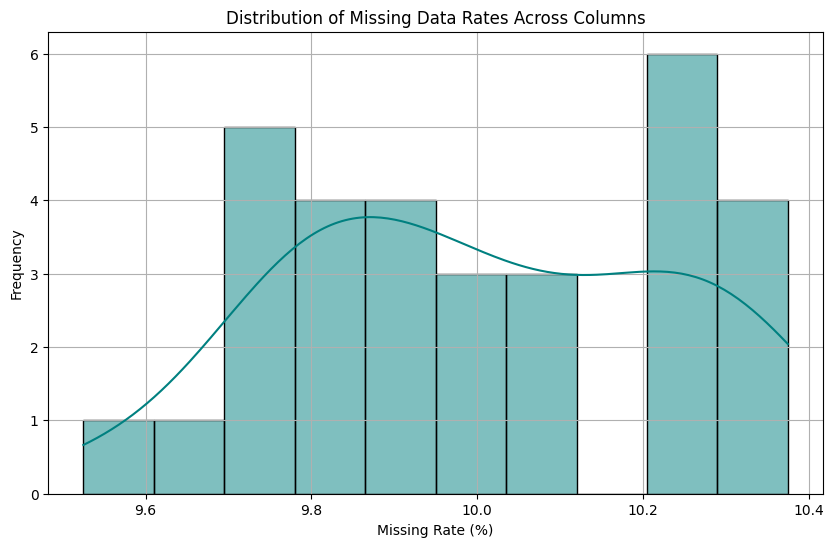

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(missing_percentage, bins=10, kde=True, color='teal')
plt.title('Distribution of Missing Data Rates Across Columns')
plt.xlabel('Missing Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This visualization shows how missingness is distributed across the dataset. Most columns have missing rates around 10%, suggesting a uniform pattern of missing values.

Further Distribution Analysis

In addition to the overall distribution of missing rates, it is useful to examine:

**Relationship Between Missing Values:** Identify if certain columns tend to have missing values simultaneously:

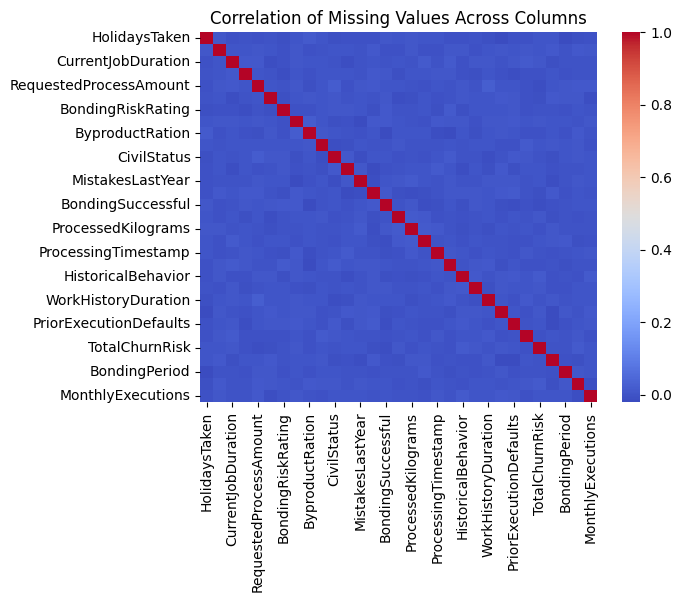

In [76]:
missing_correlation = df.isnull().corr()
sns.heatmap(missing_correlation, annot=False, cmap='coolwarm')
plt.title('Correlation of Missing Values Across Columns')
plt.show()

As it can be seen from the heatmap, missingness of data doesn't have any systematicness, but rather fully rely on random low level correlation.

#### Handling of missing data

To handle missing data, the following steps are implemented:

We decided to use cleaning methods by removing rows with missing values instead of alternative methods (e.g., imputation) since the missing percentages in all columns are consistently around 10%. This approach ensures that the dataset structure remains intact and avoids disrupting the overall data distribution. However, this decision assumes that the dataset's reduced size after cleaning will still provide sufficient data for robust analysis.

1. Calculate Total Missing Data Before Cleaning:

In [77]:
total_missing_before = df.isnull().sum().sum()
print(f"Total missing values before cleaning: {total_missing_before}")

Total missing values before cleaning: 62030


2. Remove Rows with Missing Values:

In [78]:
df_cleaned = df.dropna()

3. Calculate Total Missing Data After Cleaning:

In [79]:
total_missing_after = df_cleaned.isnull().sum().sum()
print(f"Total missing values after cleaning: {total_missing_after}")

Total missing values after cleaning: 0


4. Check if Missing Data Persists:

In [80]:
print("Columns with missing values after cleaning:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])

Columns with missing values after cleaning:
Series([], dtype: int64)


By removing rows with missing values, we ensure that the dataset is free of incomplete data. This step significantly reduces the dataset size but preserves data integrity for analysis. This process ensures the dataset is cleaned of missing values while exploring alternative strategies to preserve information.

#### Analysis of potential irrelevant data

This section focuses on identifying and handling potentially irrelevant data that may not contribute meaningfully to the analysis or model building. Removing or addressing irrelevant data helps streamline the dataset and improve performance during analysis.

1. **Low Variance Columns:** Columns with very low variance are often uninformative and may not contribute significantly to model performance. These can be identified and flagged:

In [81]:
low_variance = df_cleaned.nunique() / len(df_cleaned)
print("Columns with low variance:")
print(low_variance[low_variance < 0.01])

Columns with low variance:
RecentHolidaysTaken         0.007595
JobStatus                   0.003797
CivilStatus                 0.005063
MistakesLastYear            0.002532
HighestEducationAttained    0.006329
BondingSuccessful           0.002532
PriorExecutionDefaults      0.002532
DifferentTasksCompleted     0.007595
dtype: float64


This code calculates the proportion of unique values for each column. Columns with less than 1% unique values can be considered for removal.

Obtained Low Variance Columns:
- RecentHolidaysTaken (0.0076): This column has very few unique values relative to the total data, indicating that it might not provide significant differentiation for analysis.
- JobStatus (0.0038): The majority of entries are likely concentrated in a single category, making this column less informative.
- CivilStatus (0.0051): The low variance suggests that most entries fall into a dominant category, potentially limiting its usefulness for modeling.
- MistakesLastYear (0.0025): This column shows minimal variability, suggesting it might not capture meaningful differences in behavior.
- HighestEducationAttained (0.0063): Despite low variance, this column could still be relevant depending on the analysis goals (e.g., understanding the impact of education).
- BondingSuccessful (0.0025): The low variance here implies that most values are concentrated, which may not offer significant insights.
- PriorExecutionDefaults (0.0025): Similar to BondingSuccessful, this column's low variance may limit its utility.
- DifferentTasksCompleted (0.0076): Low variability suggests it might not contribute significantly to explaining differences in the target variable.

While these columns exhibit low variance, their inclusion or exclusion should also depend on domain knowledge and the specific objectives of the analysis.

2. Highly Correlated Columns:
High correlation between columns may indicate redundancy. Correlation analysis can highlight such relationships:

In [87]:
high_cardinality = df_cleaned.select_dtypes(include='object').nunique()
print(high_cardinality)
print("Columns with high cardinality:")
print(high_cardinality[high_cardinality > 50]) 
#we used 50 as a threshold, but generally we could use anything from 20 to +inf, as our cardinalities are low spanning sizes of 3,4,5

JobStatus                   3
CivilStatus                 4
HighestEducationAttained    5
dtype: int64
Columns with high cardinality:
Series([], dtype: int64)


These results show that all categorical columns have low cardinality, which is beneficial for preprocessing and modeling. The manageable number of categories in these columns ensures that encoding techniques, such as one-hot encoding or label encoding, can be applied without introducing significant complexity or dimensionality issues. No additional action is needed for high cardinality in this dataset.

3. Additional Potential Steps:

- **Domain-Specific Relevance:**
Certain columns may not align with the specific goals of the analysis or modeling. Domain knowledge can guide decisions to exclude such columns. For instance, a column like CivilStatus may have limited relevance if it does not contribute significantly to the target variable or analytical objectives. Similarly, metadata columns that are operational in nature but do not provide analytical value can also be considered for exclusion.

- **Interaction Effects:**
Another potential step involves examining interaction effects between columns. If two or more columns exhibit redundancy or overlap in information, it might be useful to merge them into a single feature or remove redundant ones.

- **Outlier Analysis:**
While not directly related to irrelevance, extreme outliers in certain columns may skew the data and reduce the effectiveness of models. Identifying and handling these outliers can further refine the dataset.

All potentially irrelevant columns identified in this step will undergo further scrutiny in the next stage of data profiling. At that point, decisions regarding their exclusion will be finalized based on a detailed assessment of their impact on the analysis and model-building process.

### Data profiling and statistical overview

#### Data distribution across categorical, discrete, and continuous variables

**Thing to point out :** distribution of succeded bonding

##### Distribution of discrete numerical values

##### Distribution of continous numerical values

##### Distribution of categorical values

#### Label encoding for target value 

### Correlation heatmap

#### Preprocessing dataset for expected heatmap 

#### Final correlation heatmap of cleaned and scaled dataframe

## CHECK TO ADD SOMETHING (data splitting, preparing data for modelling, feature selection)

## Machine Learning Models

### Model selection

### Model training and evaluation

### Possible resampling ??

###  Hyperparameter tuning

### Model Comparison and Feature Importance and Interpretability ???

### Evaluation and analysis of models

## Model Results and Evaluation

## Conclusion